In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-3-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


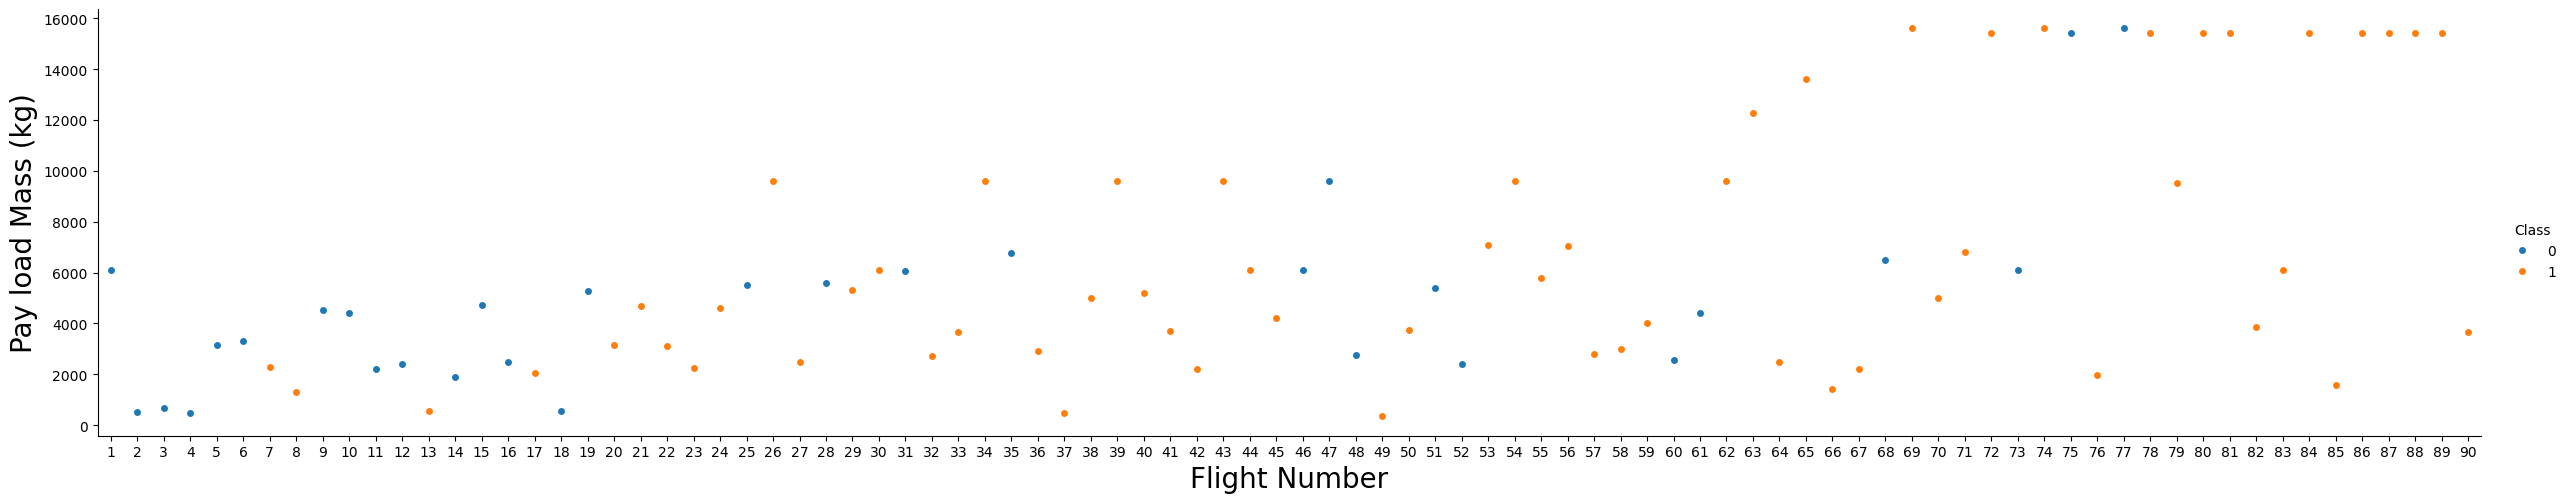

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

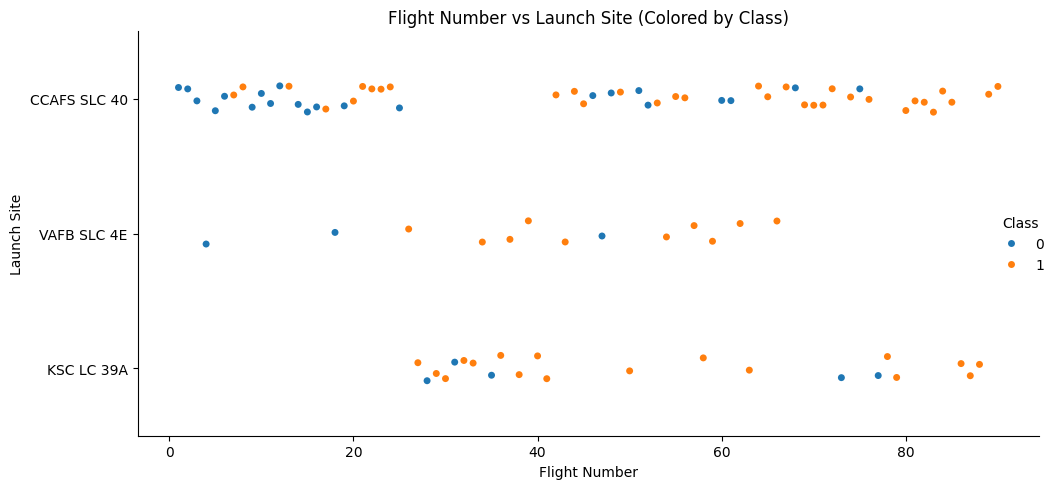

In [9]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2, height=5)

plt.title("Flight Number vs Launch Site (Colored by Class)")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.tight_layout()
plt.show()

In [10]:
# Task 2: Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

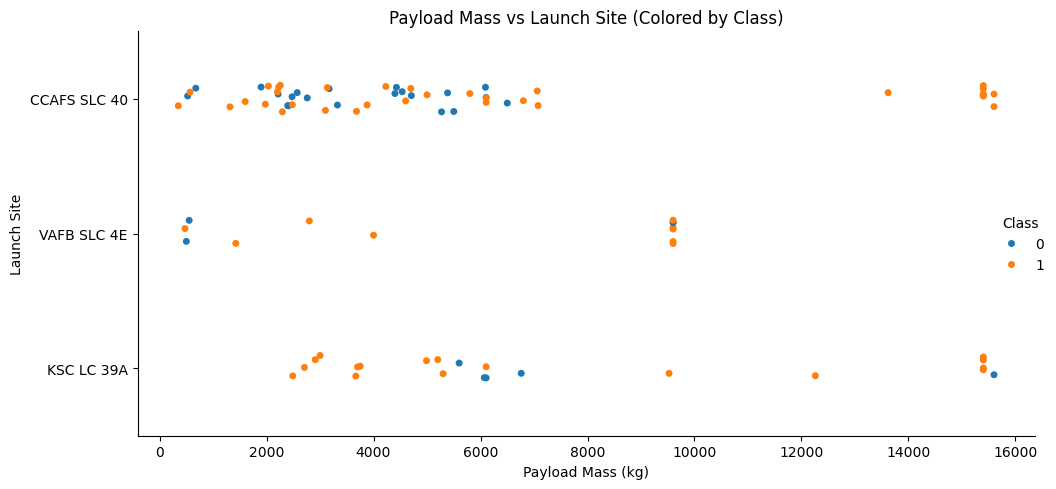

In [11]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2, height=5)

plt.title("Payload Mass vs Launch Site (Colored by Class)")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.tight_layout()
plt.show()

In [12]:
# Task 3: HINT use groupby method on Orbit column and get the mean of Class column

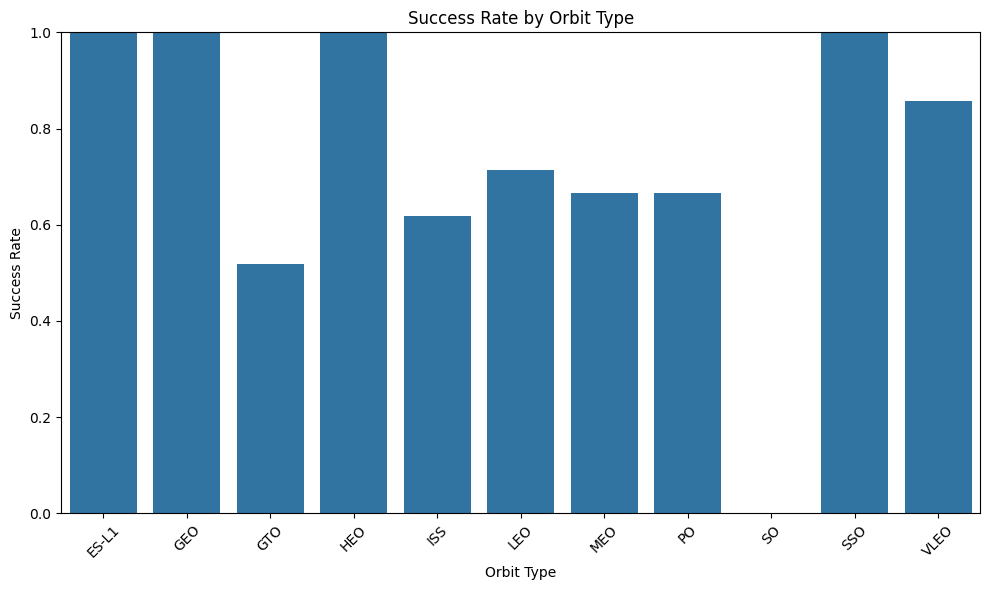

In [13]:
# Group by 'Orbit' and calculate the mean of 'Class' (which represents success rate)
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success)

plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # success rate ranges from 0 to 1
plt.tight_layout()
plt.show()

In [14]:
# Task 4: Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

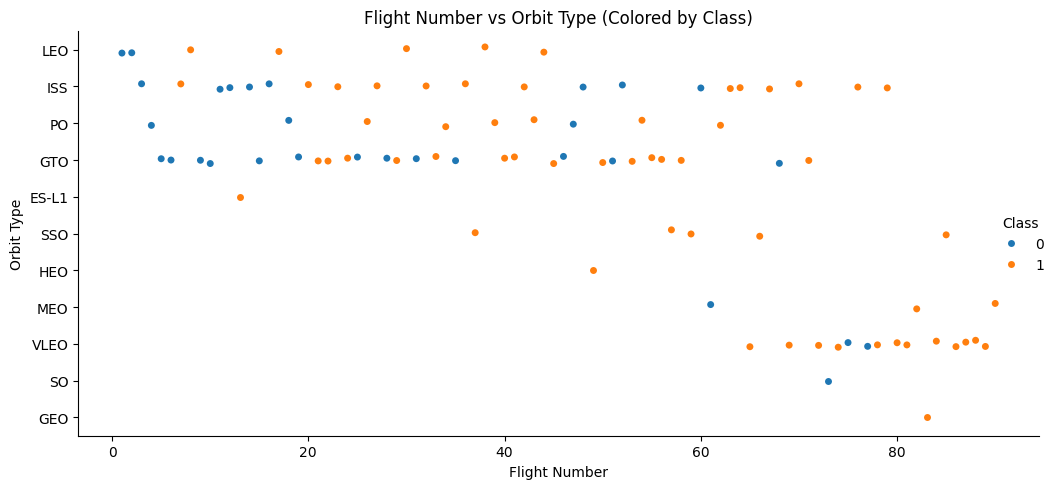

In [15]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=5)

plt.title("Flight Number vs Orbit Type (Colored by Class)")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.tight_layout()
plt.show()

In [16]:
# Task 5: Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

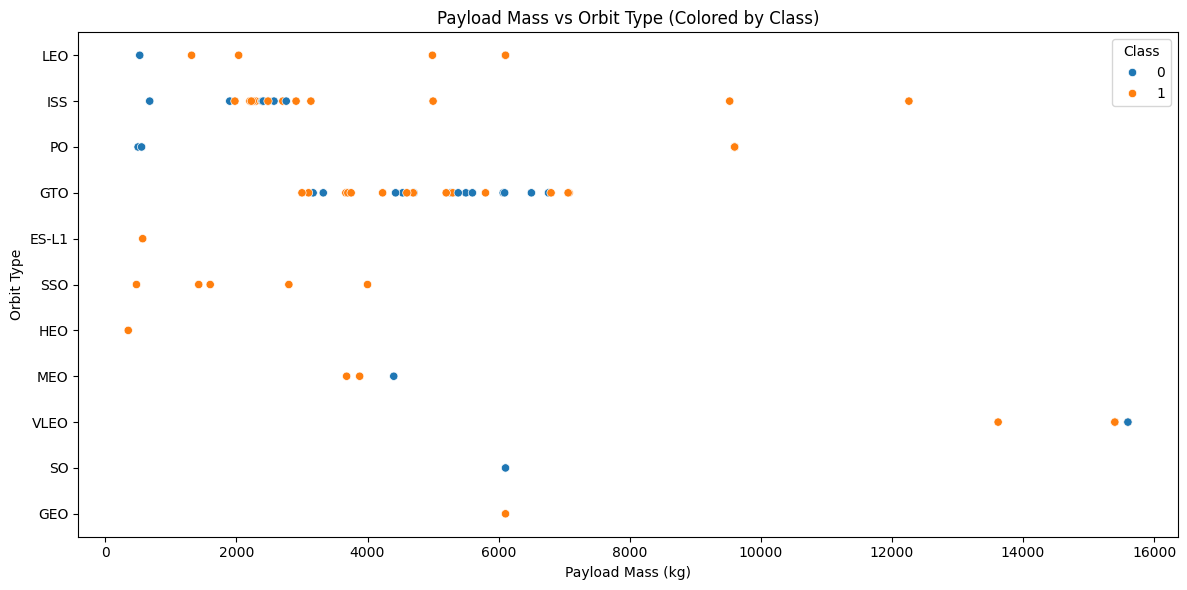

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)

plt.title("Payload Mass vs Orbit Type (Colored by Class)")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.tight_layout()
plt.show()

In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [19]:
# Task 6: Plot a line chart with x axis to be the extracted year and y axis to be the success rate

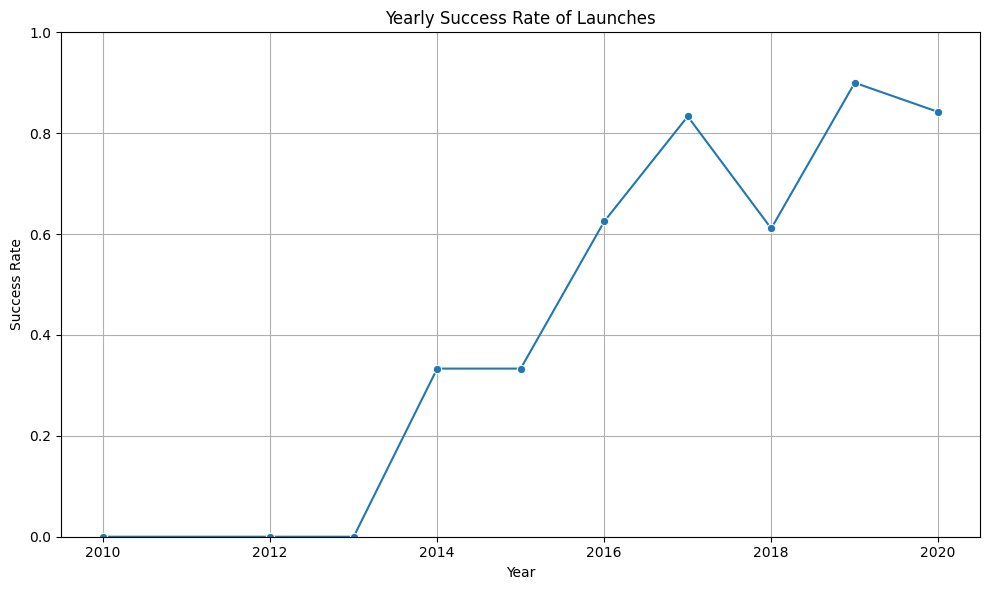

In [21]:
# Step 1: Extract year from Date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Step 2: Group by Year and calculate success rate (mean of Class)
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Step 3: Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o')

plt.title('Yearly Success Rate of Launches')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [23]:
# TASK 7 HINT: Use get_dummies() function on the categorical columns

In [24]:
import pandas as pd

# Apply one-hot encoding to the selected categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the new dataframe
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Task 8: HINT: use astype function

In [26]:
# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Optional: Confirm the types
features_one_hot.dtypes.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object